<a href="https://colab.research.google.com/github/boni-fm/TF-IDF/blob/main/TF-IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TF-IDF Otomatis

Import dan download library yang dibutuhkan

In [ ]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

import numpy as np 
from math import log 

In [ ]:
!pip install PySastrawi

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Query
query = pd.DataFrame(['mengapa perlu PPKM level-3 di liburan Natal dan tahun baru?'], columns=['sentence'])

#Data berita (15 berita dimana terdapat 10 data relevan dan 5 data tidak relevan)
news = pd.read_csv('News.csv', encoding='utf-8')

In [ ]:
news

,Sentences
0,Pemerintah akan menjalankan kebijakan Pemberla...
1,Namun untuk mencegah lonjakan kasus Covid-19 a...
2,"Selain itu, kata Muhadjir, pemberlakuan PPKM L..."
3,Rencana penerapan PPKM level 3 di seluruh Indo...
4,"Saat ini, kasus Covid-19 di Indonesia semakin ..."
5,Penyesuaian hari libur dan cuti bersama tahun ...
6,Menteri Koordinator Bidang Pembangunan Manusia...
7,Pemerintah menghapus cuti bersama Hari Raya Na...
8,"Kasmito atau Mbah Minto (74) di Demak, Jawa Te..."
9,Jepang menemukan satu kasus pertama varian Omi...


Preprocessing Data Otomatis

In [ ]:
#Function menghapus angka dan tanda baca
def removeNonWord(doc): 
    #hapus seluruh kata yang mengandung angka, contoh: perempuan2 
    result = doc.replace({'\w*\d\w*': ''}, regex=True) 
 
    #hapus seluruh karakter yang tidak termasuk alphabet 
    result = result.replace({'[\W_]+': ' '}, regex=True) 
 
    #remove null dari hasil final 
    return result[result.notnull()] 

In [ ]:
#Lowercasing dan Menghapus angka&tanda baca
query_lower = query['sentence'].str.lower()
query = removeNonWord(query_lower)

news_lower = news['Sentences'].str.lower()
news = removeNonWord(news_lower)

In [ ]:
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

news_stemmed = [stemmer.stem(sentence) for sentence in news]
query_stemmed = stemmer.stem(query[0])

In [ ]:
news_stemmed

['perintah akan jalan bijak laku batas giat masyarakat ppkm level di seluruh indonesia lama libur hari natal dan tahun baru',
 'namun untuk cegah lonjak kasus covid akibat libur perintah akan terap ppkm level di seluruh indonesia saat libur panjang natal dan tahun baru mulai desember hingga januari',
 'selain itu kata muhadjir laku ppkm level lama libur natal tahun baru sangat penting laku pasal pandemi covid di indonesia belum selesai',
 'rencana terap ppkm level di seluruh indonesia pada saat natal dan tahun baru ini agar komunikasi dengan baik kepada masyarakat kata jokowi saat pimpin rapat batas evaluasi ppkm di istana presiden jakarta senin november',
 'saat ini kasus covid di indonesia makin kendali dan banyak daerah yang status ppkm level namun untuk cegah lonjak kasus covid akibat libur perintah akan terap ppkm level di seluruh indonesia saat libur panjang natal dan tahun baru mulai desember hingga januari',
 'sesuai hari libur dan cuti sama tahun laku oleh perintah untuk minim

In [ ]:
#Tokenizing
news_token = []
query_token = word_tokenize(query_stemmed)

for doc in news_stemmed:
  news_token.append(word_tokenize(doc))

In [ ]:
news_token

In [ ]:
#Stopword Removal
listStopword =  set(stopwords.words('indonesian'))

query = []
for t in query_token:
  if t not in listStopword:
    query.append(t)


news = []
temp_stop = ''
for i in range(0, 15):
  for token in news_token[i]:
    if token not in listStopword:
      temp_stop = temp_stop + token + ' '
  news.append(temp_stop)
  temp_stop = ''

query = pd.DataFrame(query, columns=['words'])
news = pd.DataFrame(news)
news.columns = ['sentences']

In [ ]:
query

,words
0,ppkm
1,level
2,libur
3,natal


In [ ]:
news

,sentences
0,pemerintah jalan bijak laku batas giat masyara...
1,cegah lonjak covid akibat liburan pemerintah t...
2,muhadjir laku ppkm level libur natal laku pasa...
3,rencana terap ppkm level indonesia natal komun...
4,covid indonesia kendali daerah status ppkm lev...
5,sesuai libur cuti pemerintah minimal gerak mas...
6,menteri koordinator bidang bangun manusia buda...
7,pemerintah hapus cuti raya natal jatuh pekan c...
8,kasmito mbah minto demak jawa bela lawan curi ...
9,jepang temu varian omicron negara. varian covi...


TF-IDF

In [ ]:
def idf(doc, wordBank): 
    #hitung jumlah doc 
    N = len(doc.index) 
 
    #buat dataframe dengan header word dan idf 
    result = pd.DataFrame(columns=['word', 'idf']) 
 
    #untuk setiap kata pada wordBank lakukan..... 
    for index, word in wordBank.iterrows(): 
        #hitung jumlah doc yang mengandung kata word['words'] 
        dft = np.sum(doc['sentences'].str.contains(word['words'])) 
 
        #hitung inverse document frequency smooth 
        idft = log(N / (dft + 1), 10) 
 
        #tambahkan idf untuk setiap kata pada data frame 
        result = result.append(pd.Series([word['words'],  idft], index=['word', 'idf']), ignore_index=True) 
 
    #return variable result 
    return result 


def tf(doc, wordBank): 
    #split kata berdasarkan spasi 
    wordList = doc['sentences'].str.split(' ') 
    #hitung jumlah kata pada setiap doc 
    maxFt = [len(s)  for s in wordList] 
    #buat DataFrame kosong untuk menyimpan hasil perhitungan Tf 
    result = pd.DataFrame() 
    #untuk setiap word dalam wordbank lakukan .... 
    for index, word in wordBank.iterrows(): 
        #hitung frekuensi kata untuk setiap doc 
        ft = np.add([s.count(word['words']) for s in wordList], 0) 
        #tf log normalization 
        ftd = 1 + np.log10(ft) 
        #tambahkan hasil perhitungan tf kedalam DataFrame 
        result = result.append(pd.Series(ftd), ignore_index=True) 
    #replace -inf with zero 
    result = result.replace(-np.inf, 0) 
    #return variable result 
    return result 
 
def tfIdf(tf, idf): 
    #buat DataFrame kosong untuk menyimpan hasil perhitungan Tf-Idf 
    result = pd.DataFrame() 
    #untuk setiap tf 
    for i in tf: 
        #tf idf untuk document term weighting tf * idf 
        tfIdf = tf[i] * idf['idf'] 
        #tambahkan hasil perhitungan tf idf kedalam DataFrame 
        result = result.append(pd.Series(tfIdf), ignore_index=True) 
    #return variable result 
    return result 
 
 

#hitung nilai IDF 
resultIDF = idf(news, query) 

#hitung nilai TF 
resultTF = tf(news, query) 
 
#hitung nilai Tf-Idf 
resultTfIdf = tfIdf(resultTF, resultIDF) 
 
print(resultTfIdf) 

           0         1         2         3
0   0.221849  0.273001  0.273001  0.176091
1   0.221849  0.273001  0.355183  0.176091
2   0.221849  0.273001  0.273001  0.176091
3   0.288632  0.273001  0.000000  0.176091
4   0.288632  0.355183  0.355183  0.176091
5   0.000000  0.000000  0.355183  0.176091
6   0.221849  0.273001  0.273001  0.176091
7   0.000000  0.000000  0.000000  0.176091
8   0.000000  0.000000  0.000000  0.000000
9   0.000000  0.000000  0.000000  0.000000
10  0.221849  0.000000  0.000000  0.000000
11  0.221849  0.273001  0.273001  0.176091
12  0.000000  0.000000  0.000000  0.000000
13  0.000000  0.000000  0.000000  0.000000
14  0.000000  0.000000  0.000000  0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


In [ ]:
resultTfIdf

,0,1,2,3
0,0.221849,0.273001,0.273001,0.176091
1,0.221849,0.273001,0.355183,0.176091
2,0.221849,0.273001,0.273001,0.176091
3,0.288632,0.273001,0.000000,0.176091
4,0.288632,0.355183,0.355183,0.176091
5,0.000000,0.000000,0.355183,0.176091
6,0.221849,0.273001,0.273001,0.176091
7,0.000000,0.000000,0.000000,0.176091
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000


In [ ]:
acc_tfidf = resultTfIdf.sum(axis=1)
acc_tfidf

0     0.943943
1     1.026124
2     0.943943
3     0.737724
4     1.175089
5     0.531274
6     0.943943
7     0.176091
8     0.000000
9     0.000000
10    0.221849
11    0.943943
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [ ]:
acc_tfidf

0     0.943943
1     1.026124
2     0.943943
3     0.737724
4     1.175089
5     0.531274
6     0.943943
7     0.176091
8     0.000000
9     0.000000
10    0.221849
11    0.943943
12    0.000000
13    0.000000
14    0.000000
dtype: float64

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,1.0,1.30103,1.30103,0.00000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.00000,1.30103,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.00000,1.00000,1.30103,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.00000,1.00000,1.00000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
resultTfIdf

,0,1,2,3
0,0.221849,0.273001,0.273001,0.176091
1,0.221849,0.273001,0.355183,0.176091
2,0.221849,0.273001,0.273001,0.176091
3,0.288632,0.273001,0.000000,0.176091
4,0.288632,0.355183,0.355183,0.176091
5,0.000000,0.000000,0.355183,0.176091
6,0.221849,0.273001,0.273001,0.176091
7,0.000000,0.000000,0.000000,0.176091
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000


#Akurasi TF-IDF Manual

In [ ]:
news = pd.read_csv('manual.csv')
query = pd.read_csv('manualWord.csv')

#hitung nilai IDF 
resultIDF = idf(news, query) 

#hitung nilai TF 
resultTF = tf(news, query) 
 
#hitung nilai Tf-Idf 
resultTfIdf = tfIdf(resultTF, resultIDF) 
 
print(resultTfIdf) 

           0         1         2         3
0   0.221849  0.273001  0.273001  0.176091
1   0.221849  0.273001  0.273001  0.176091
2   0.221849  0.273001  0.273001  0.176091
3   0.288632  0.273001  0.000000  0.176091
4   0.288632  0.355183  0.273001  0.176091
5   0.000000  0.000000  0.355183  0.176091
6   0.221849  0.273001  0.273001  0.176091
7   0.000000  0.000000  0.000000  0.176091
8   0.000000  0.000000  0.000000  0.000000
9   0.000000  0.000000  0.000000  0.000000
10  0.221849  0.000000  0.000000  0.000000
11  0.221849  0.273001  0.273001  0.176091
12  0.000000  0.000000  0.000000  0.000000
13  0.000000  0.000000  0.000000  0.000000
14  0.000000  0.000000  0.000000  0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


In [ ]:
acc_tfidf2 = resultTfIdf.sum(axis=1)
acc_tfidf2

0     0.943943
1     0.943943
2     0.943943
3     0.737724
4     1.092907
5     0.531274
6     0.943943
7     0.176091
8     0.000000
9     0.000000
10    0.221849
11    0.943943
12    0.000000
13    0.000000
14    0.000000
dtype: float64

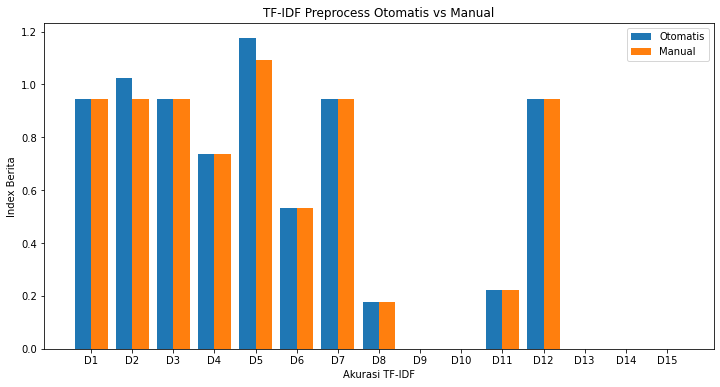

In [ ]:
import matplotlib.pyplot as plt 

X = ['D1', 'D2', 'D3', 'D4', 'D5',
          'D6', 'D7', 'D8', 'D9', 'D10',
          'D11', 'D12', 'D13', 'D14', 'D15']
X_axis = np.arange(len(news))

plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, acc_tfidf, 0.4, label = 'Otomatis')
plt.bar(X_axis + 0.2, acc_tfidf2, 0.4, label = 'Manual')

plt.xticks(X_axis, X)
plt.xlabel("Akurasi TF-IDF")
plt.ylabel("Index Berita")
plt.title("TF-IDF Preprocess Otomatis vs Manual")
plt.legend()
plt.show()